# RAVDESS Data preparation model 1 

This dataset is much easier to work with than the IEMOCAP one since almost every files are the same length, which removes a BIG part of complexity, especially when it comes to data normalisation and padding etc...

# First approach

to begin lightly, we'll only work with high intensity emotions since that might be easier for the CNN model to distinguish emotion difference through spectrogramms.

We might later work with the entire dataset to see smaller variations in emotions.

data extracted


C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_10984\322937468.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  soundwaves = np.array(soundwaves)


finished !


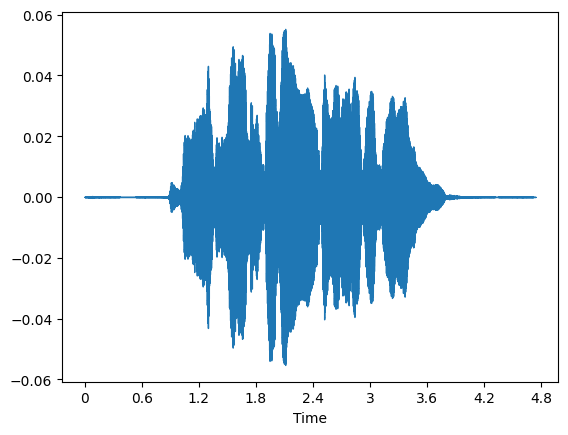

In [82]:
import matplotlib.pyplot as plt  #MAKE SURE TO IMPORT MATPLOTLIB BEFORE LIBROSA, otherwise matplolib will return errors somehow..
import os
import librosa
import librosa.display
import re
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

audio_dir = "../../RAVDESS_dataset/"

""" 
Modality            (01 = full-AV, 02 = video-only, 03 = audio-only).
Vocal channel       (01 = speech, 02 = song).
Emotion             (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
Emotional intensity (01 = normal, 02 = strong).     
Statement           (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
Repetition          (01 = 1st repetition, 02 = 2nd repetition).
Actor               (01 to 24. Odd numbered actors are male, even numbered actors are female).
"""

paths=[]
emotion=[]
soundwaves=[]
# iterate over the files in the directory, grouped by three
for root,dirs,files in os.walk(audio_dir):
    for file in files:
        if file.split("-")[3]!="02":
            continue

        paths.append(file)
        if file.split('-')[2]=='08':
            emotion.append('07')
        else:
            emotion.append(file.split('-')[2])
        y, sr = librosa.load(f"{root}/{file}", sr=22050,mono=True)
        soundwaves.append(y)
print("data extracted")
librosa.display.waveshow(soundwaves[2])
paths = np.array(paths)
emotion = np.array(emotion)
soundwaves = np.array(soundwaves)
print("finished !")

In [83]:
#Data padding 

import numpy as np
import statistics
from tensorflow.keras.preprocessing.sequence import pad_sequences

# find the maximum length of the soundwaves
max_length = max(len(soundwave) for soundwave in soundwaves)
print(max_length)

# apply padding of zeros
padded_soundwaves = pad_sequences(soundwaves, maxlen=max_length, padding="post",dtype='float32')


140526


In [84]:
#Save data in - final_dataset/
np.save("processing_dataset/padded_soundwaves.npy", padded_soundwaves)
print("Padded_soundwaves saved!") 

Padded_soundwaves saved!


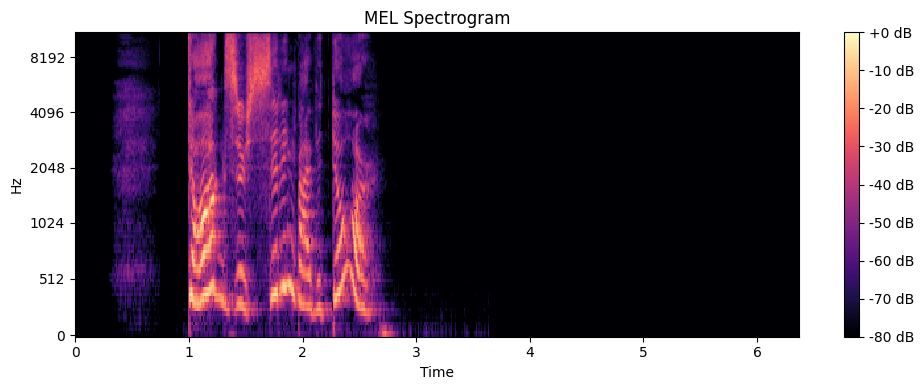

In [85]:
#generates MEL-spectogramms for each elements of padded_soundwaves

sr = 22050
n_fft = 512
mel_spec_array=[]
# generate MEL spectrograms for each padded soundwave
for soundwave in padded_soundwaves:
    mel_spec = librosa.feature.melspectrogram(y=soundwave, sr=sr, n_fft=n_fft, hop_length=int(n_fft/2))
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # convert to decibel scale
    mel_spec_array.append(mel_spec_db)

# plot the MEL spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=int(n_fft/2), x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('MEL Spectrogram')
plt.tight_layout()
plt.show()

In [86]:
#save labels as unicode characters (useful if we're later using non-latin characters)

# Convert the list to a NumPy array of Unicode strings

# Save the array to a .npy file
np.save('processing_dataset/labels.npy', emotion)
print("labels saved!")


labels saved!


In [87]:
#Save data in - final_dataset/
import numpy as np

mel_spec_array = np.array(mel_spec_array)
np.save("final_dataset/spectrograms.npy", mel_spec_array)
print("spectrogramms saved!")  


spectrogramms saved!
